In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [723]:
#First,we define the value of h,the corresponding range in x and the constants
#If you need more information about the parameters of our model please visit our Wiki. 
h=0.200 #step value
a=60    #5999990000.000 ajustado a mano, no biológicamente posible #afecta 
bXR=300.000 #No va 
kXR=3000.000
gXR=0.060
dXRa=0.19980 #actived XR, parece que no afecta mucho 
aX=60.00
bX=300.000 
kc=0.000001406334639 #real, importante 
nX=1.000
kx=1409.148 #parece que no afecta mucho
gCY=0.00071666667 #afecta
kXRa=3000.000 #esto no va 
gXRa=0.0231 #parece que no afecta mucho
dXR=60.000 #esto tampoco 

n_points = int((4000.0+h)/h)
t = zeros(n_points)
XR = zeros(n_points)
CY = zeros(n_points) 
A = zeros(n_points)
XRa = zeros(n_points)
#A no cambia 

In [724]:


#we define all the functions 
def func_XRa_prime(t,XRa,CY,XR,A):
    return kc*XR*A-(gXRa*XRa)-(dXRa*XRa)

def func_XR_prime(t,XRa,CY,XR,A):
    return a-(kc*A*kXR)-(gXR*XR)+(dXRa*XRa)

def func_CY_prime(t,XRa,CY,XR,A):
    return aX+(kc*A*XR)-(gCY*CY)



In [725]:
#First we initialize the arrays
t[0] = 0.0
XRa[0] = 0.0
XR[0] = 0.0
CY[0] = 0.0
A[0] = 0.0
#then we determine the input function
for i in range(400):
    A[i]=0.0
for i in range(401,n_points):
    A[i]=4000*sin(t[i]/300)+4000
    
    
#And finally we do 4th order Runge Kutta. 
for i in range(1,n_points):
    
    k1_XRa = func_XRa_prime(t[i-1],XRa[i-1],CY[i-1],XR[i-1],A[i-1])
    k1_CY = func_CY_prime(t[i-1],XRa[i-1],CY[i-1],XR[i-1],A[i-1])
    k1_XR = func_XR_prime(t[i-1],XRa[i-1],CY[i-1],XR[i-1],A[i-1])
    
    #first step
    t1 = t[i-1] + (h/2.0)
    XRa1 = XRa[i-1] + (h/2.0) * k1_XRa
    CY1 = CY[i-1] + (h/2.0) * k1_CY
    XR1 = XR[i-1] + (h/2.0) * k1_XR

    k2_XRa = func_XRa_prime(t1,XRa1,CY1,XR1,A[i-1])
    k2_CY = func_CY_prime(t1,XRa1,CY1,XR1,A[i-1])
    k2_XR = func_XR_prime(t1,XRa1,CY1,XR1,A[i-1])
    
    
    #second step
    t2 = t[i-1] + (h/2.0)
    XRa2 = XRa[i-1] + (h/2.0) * k2_XRa
    CY2 = CY[i-1] + (h/2.0) * k2_CY
    XR2 = XR[i-1] + (h/2.0) * k2_XR
     
    k3_XRa = func_XRa_prime(t2,XRa2,CY2,XR2,A[i-1])
    k3_CY = func_CY_prime(t2,XRa2,CY2,XR2,A[i-1])
    k3_XR = func_XR_prime(t2,XRa2,CY2,XR2,A[i-1])
    
    
    #third step
    t3 = t[i-1] + h
    XRa3 = XRa[i-1] + (h/2.0) * k3_XRa
    CY3 = CY[i-1] + (h/2.0) * k3_CY
    XR3 = XR[i-1] + (h/2.0) * k3_XR
    
    k4_XRa = func_XRa_prime(t3,XRa3,CY3,XR3,A[i-1])
    k4_CY = func_CY_prime(t3,XRa3,CY3,XR3,A[i-1])
    k4_XR = func_XR_prime(t3,XRa3,CY3,XR3,A[i-1])
    
    
     #fourth step
    average_k_XRa = (1.0/6.0)*(k1_XRa + 2.0*k2_XRa + 2.0*k3_XRa + k4_XRa)
    average_k_CY = (1.0/6.0)*(k1_CY + 2.0*k2_CY + 2.0*k3_CY + k4_CY)
    average_k_XR = (1.0/6.0)*(k1_XR + 2.0*k2_XR + 2.0*k3_XR + k4_XR)

    t[i] = t[i-1] + h
    XRa[i] = XRa[i-1] + h * average_k_XRa
    CY[i] = CY[i-1] + h * average_k_CY
    XR[i] = XR[i-1] + h * average_k_XR
    
    if (i < 400):
        A[i]=0.0
    if (401<i<n_points):
        A[i]=4000*sin(t[i]/300)+4000
  
    
   
    

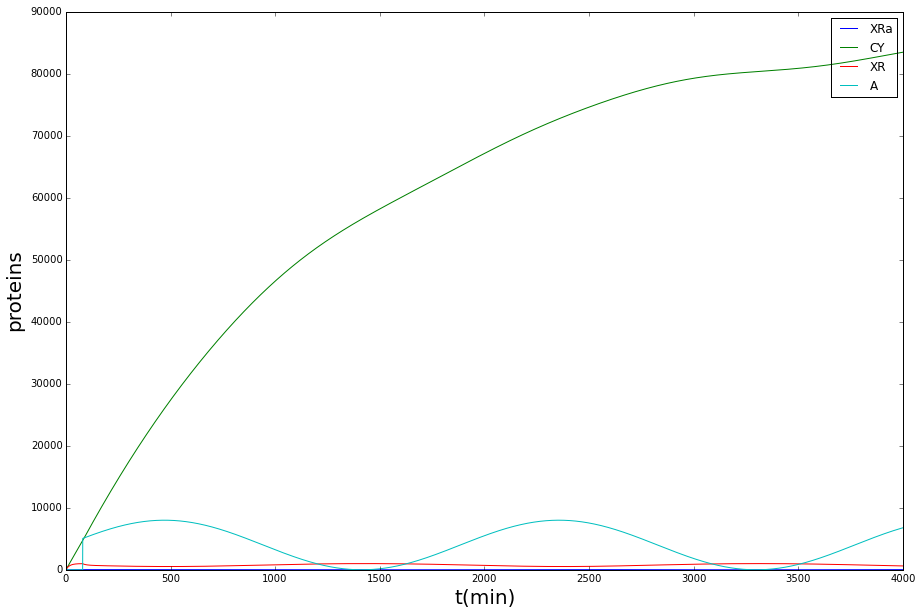

In [726]:
#Plot

plot(t,XRa,label='XRa')
plot(t,CY,label='CY')
plot(t,XR,label='XR')
plot(t,A,label='A')
plt.xlabel('t(min)',size=20)
plt.ylabel('proteins',size=20)
legend()
figure(figsize(15,10))
plt.savefig("Shewanelladet.png", format='png',bbox_inches='tight',transparent=False)

In [722]:
print h

0.2
